In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import imageio
from imageio import imread

In [63]:
def get_images(folder):
    return glob.glob(folder+"/*.j*")

In [70]:
phone = 'A01_GioneeS55'

In [73]:
pictures = get_images(phone)
fractals = pictures[0:33]
regulars = pictures[33:]
fractals

['A01_GioneeS55\\Fractal-HDR-1.jpg',
 'A01_GioneeS55\\Fractal-HDR-10.jpg',
 'A01_GioneeS55\\Fractal-HDR-11.jpg',
 'A01_GioneeS55\\Fractal-HDR-12.jpg',
 'A01_GioneeS55\\Fractal-HDR-13.jpg',
 'A01_GioneeS55\\Fractal-HDR-2.jpg',
 'A01_GioneeS55\\Fractal-HDR-3.jpg',
 'A01_GioneeS55\\Fractal-HDR-4.jpg',
 'A01_GioneeS55\\Fractal-HDR-5.jpg',
 'A01_GioneeS55\\Fractal-HDR-6.jpg',
 'A01_GioneeS55\\Fractal-HDR-7.jpg',
 'A01_GioneeS55\\Fractal-HDR-8.jpg',
 'A01_GioneeS55\\Fractal-HDR-9.jpg',
 'A01_GioneeS55\\Fractal-SDR-1.jpg',
 'A01_GioneeS55\\Fractal-SDR-10.jpg',
 'A01_GioneeS55\\Fractal-SDR-11.jpg',
 'A01_GioneeS55\\Fractal-SDR-12.jpg',
 'A01_GioneeS55\\Fractal-SDR-13.jpg',
 'A01_GioneeS55\\Fractal-SDR-14.jpg',
 'A01_GioneeS55\\Fractal-SDR-15.jpg',
 'A01_GioneeS55\\Fractal-SDR-16.jpg',
 'A01_GioneeS55\\Fractal-SDR-17.jpg',
 'A01_GioneeS55\\Fractal-SDR-18.jpg',
 'A01_GioneeS55\\Fractal-SDR-19.jpg',
 'A01_GioneeS55\\Fractal-SDR-2.jpg',
 'A01_GioneeS55\\Fractal-SDR-20.jpg',
 'A01_GioneeS55\\Fracta

(320, 480, 3)


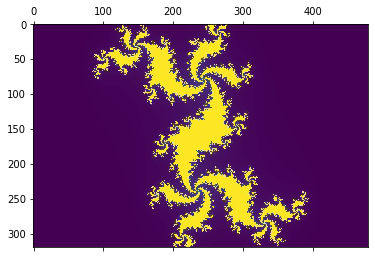

In [65]:
ex = imread(fractals[1])
print(ex.shape)
plt.matshow(ex)

(4208, 3120, 3)


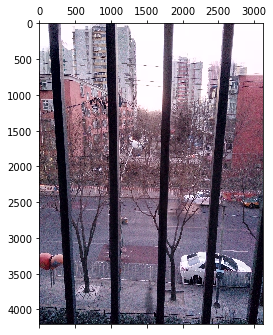

In [66]:
exr = imread(regulars[1])
print(exr.shape)
plt.matshow(exr)

In [7]:
fractal_matrices = np.array([])
for i in range(len(fractals)):
    fractal = imread(fractals[i]).flatten()
    fractal_matrices = np.append(fractal_matrices, fractal, axis = 0)
fractal_matrices = fractal_matrices.reshape(len(fractals), len(fractal))
print(fractal_matrices.shape)
print(fractal_matrices)

(33, 460800)
[[68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]
 ...
 [68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]
 [68.  0. 83. ... 68.  0. 83.]]


In [50]:
regular_matrices = np.array([])
for i in range(len(regulars)):
    reg = imread(regulars[i]).flatten()
    regular_matrices = np.append(regular_matrices, reg, axis = 0)
regular_matrices = regular_matrices.reshape(len(regulars), len(reg))
print(regular_matrices.shape)
print(regular_matrices)

(33, 39386880)
[[150. 144. 158. ... 155. 155. 147.]
 [255. 254. 255. ...  41.  62.  89.]
 [ 38.  53.  60. ...  23.   3.  14.]
 ...
 [ 31.  34.  25. ...  55.  64.  73.]
 [239. 202. 157. ...  36.  33.  44.]
 [ 49.  72.  78. ... 162. 163. 131.]]


In [67]:
class_f_labels = np.zeros(len(fractals))
for i in range(len(fractals)):
    if fractals[i][len(phone)+9:len(phone)+12] == 'HDR':
        class_f_labels[i] = 1
    else:
        class_f_labels[i] = 0


In [56]:
class_r_labels = np.zeros(len(regulars))
for i in range(len(regulars)):
    if regulars[i][len(phone)+1:len(phone)+4] == 'HDR':
        class_r_labels[i] = 1
    else:
        class_r_labels[i] = 0


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
import sklearn.model_selection as model_selection

train_f_vectors, test_f_vectors, train_f_labels, test_f_labels = model_selection.train_test_split(fractal_matrices, class_f_labels, train_size=0.75,test_size=0.25)

print(train_f_vectors.shape)
print(test_f_vectors.shape)
print(train_f_labels.shape)
print(test_f_labels.shape)
print(type(train_f_vectors))

(24, 460800)
(9, 460800)
(24,)
(9,)
<class 'numpy.ndarray'>


In [69]:
train_r_vectors, test_r_vectors, train_r_labels, test_r_labels = model_selection.train_test_split(regular_matrices, class_r_labels, train_size=0.75,test_size=0.25)

print(train_r_vectors.shape)
print(test_r_vectors.shape)
print(train_r_labels.shape)
print(test_r_labels.shape)
print(type(train_r_vectors))

(24, 39386880)
(9, 39386880)
(24,)
(9,)
<class 'numpy.ndarray'>


In [11]:
###############################################################################
# Train a SVM classification model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_f_vectors
tmp_labels = train_f_labels

print("Fitting the classifier to the training set")
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.0001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Runtime 60.143301248550415


In [12]:
predict_vectors = test_f_vectors
true_lables = test_f_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_lables, pred_labels))
print(confusion_matrix(true_lables, pred_labels, labels=range(2)))


              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71         5
         1.0       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9

[[5 0]
 [4 0]]


C:\Users\danni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.decomposition import PCA

n_components = len(train_f_vectors)

pca = PCA(n_components=n_components, whiten=True)

pca_fit = pca.fit(train_vectors)

In [15]:
pca_train_vectors = pca.transform(train_f_vectors)
pca_test_vectors = pca.transform(test_f_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Training set changed from a size of:  (24, 460800)  to:  (24, 24)
Testing set changed from a size of:  (9, 460800)  to:  (9, 24)


In [16]:
tmp_vectors = pca_train_vectors
tmp_labels = train_labels

In [17]:
rerun_training = True

start = time.time()
if rerun_training:
    
    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
end = time.time()
print("Runtime",end - start)
    

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Runtime 0.17656445503234863


In [18]:
predict_vectors = pca_test_vectors
true_labels = test_labels

In [19]:
print("Predicting ")
pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))

Predicting people's names on the test set
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.44      1.00      0.62         4

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9

[[0 5]
 [0 4]]


C:\Users\danni\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
